In [1]:
from ipywidgets import interact
import ipywidgets as widgets
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
from scipy import stats
from scipy import signal
from scipy.io import wavfile
import numpy as np
import seaborn as sns
import os

sns.set_theme()
sns.set_style("darkgrid")

In [4]:
#segmento 1
fs, p1 = wavfile.read('sonido-presion/presion_segmento_1.wav')
fs, s1 = wavfile.read('sonido-presion/sonido_segmento_1.wav')
p1 = p1/max(p1)
s1 = s1/max(s1)

#segmento 2
fs, p2 = wavfile.read('sonido-presion/presion_segmento_2.wav')
fs, s2 = wavfile.read('sonido-presion/sonido_segmento_2.wav')
p2 = p2/max(p2)
s2 = s2/max(s2)

#segmento 3
fs, p3 = wavfile.read('sonido-presion/presion_segmento_3.wav')
fs, s3 = wavfile.read('sonido-presion/sonido_segmento_3.wav')
p3 = p3/max(p3)
s3 = s3/max(s3)

### Segmento 1

In [89]:

dt = 1/fs
N  = len(p1)
t = np.arange(0, N) * dt

print(f'dt muestreo: {dt} \n tiempo total de medición {t[-1]} s')

dt muestreo: 2.2650056625141562e-05 
 tiempo total de medición 0.8827859569648924 s


In [69]:
%matplotlib inline
def plot1(offset):
    offset = 1e-2 * offset
    std = np.std(s1[p1 + 0.4<0])
    umbral = std * 10
    b = p1 + offset

        #plot valores medios
    t_sil = t[b<0]
    s1_sil = s1[b<0] 
    b_sil = b[b<0]
    
    plt.figure(figsize=(15,4))

    plt.plot(t, s1)
    plt.plot(t, b)
    plt.plot(t_sil, s1_sil, '.', color = 'red', label = 'silencio')
    plt.plot(t_sil, b_sil, '.', color = 'orange')
    plt.axhline(umbral , ls = '--', label = 'umbral' , color = 'black', alpha = .5)
    plt.plot(t_sil[s1_sil>umbral], s1_sil[s1_sil>umbral], '.', color = 'black')
    plt.xlim(0,t[-1])
    plt.show()
    #plt.legend()


#params
offset = widgets.FloatSlider(value=4.2 , min= 0 , max= 40, step= 1e-2, description='offset')

# linkeo el slider con los graficos
output1 = widgets.interactive_output(plot1, {'offset': offset})

# muestro los outputs#
display(offset, output1)


FloatSlider(value=4.2, description='offset', max=40.0, step=0.01)

Output()

In [72]:
# offset tal que todas las silbas estén en silencio. Después veo cómo compensar esto en el final de las silabas que ya se silenciaron antes.
offset1 = 0.3

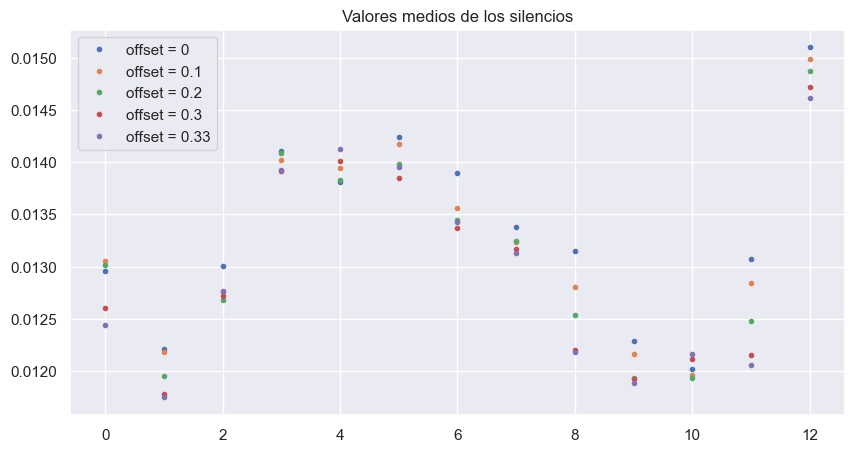

In [60]:

offset = [0,0.1,0.2,0.3,0.33]
plt.figure(figsize = (10,5))
plt.title('Valores medios de los silencios')
# Find the break points where the difference between elements > 1
for o in offset :
    mean_silencios = []
    b = p1 + o
    splits = np.where(np.diff(t[b<0]) > dt*2)[0] + 1
    # Split the array at those points
    silencios = np.split(t[b<0], splits)
    
    # Output
    for i, silencio in enumerate(silencios):
        t_i = silencio[0]
        t_f = silencio[-1]
    
        mean_silencio = np.mean(s1[(t > t_i ) & (t < t_f )])
        mean_silencios.append(mean_silencio)
    

    plt.plot(range(13), mean_silencios,'.', label = f'offset = {o}')
plt.legend()
plt.show()

In [95]:
t_silabas = {'segmento_1': {} , 'segmento_2': {}, 'segmento_3': {}}

In [93]:
sil[0]

np.float64(0.7684258210645526)

In [97]:
b = p1 + offset1
splits = np.where(np.diff(t[b>0]) > dt*2)[0] + 1
    
silabas = np.split(t[b>0], splits)
silabas.pop(-1) #saco el primer segmento que no forma una silaba
silabas.pop(0) #saco el último segmento que no llega a terminar la silaba
for i, sil in enumerate(silabas):
    t_silabas['segmento_1'][i] = {}
    t_silabas['segmento_1'][i]['t_i'] = sil[0]
    t_silabas['segmento_1'][i]['t_f'] = sil[-1]
    

### Segmento 2

In [98]:

dt = 1/fs
N  = len(p2)
t = np.arange(0, N) * dt

print(f'dt muestreo: {dt} \n tiempo total de medición {t[-1]} s')

dt muestreo: 2.2650056625141562e-05 
 tiempo total de medición 0.9829898074745187 s


In [78]:
%matplotlib inline
def plot1(offset):
    offset = 1e-2 * offset
    std = np.std(s2[p2 + 0.4<0])
    umbral = std * 10
    b = p2 + offset

        #plot valores medios
    t_sil = t[b<0]
    s2_sil = s2[b<0] 
    b_sil = b[b<0]
    
    plt.figure(figsize=(15,4))

    plt.plot(t, s2)
    plt.plot(t, b)
    plt.plot(t_sil, s2_sil, '.', color = 'red', label = 'silencio')
    plt.plot(t_sil, b_sil, '.', color = 'orange')
    plt.axhline(umbral , ls = '--', label = 'umbral' , color = 'black', alpha = .5)
    plt.plot(t_sil[s2_sil>umbral], s2_sil[s2_sil>umbral], '.', color = 'black')
    plt.xlim(0,t[-1])
    plt.show()
    #plt.legend()


#params
offset = widgets.FloatSlider(value=25 , min= 0 , max= 40, step= 1e-2, description='offset')

# linkeo el slider con los graficos
output1 = widgets.interactive_output(plot1, {'offset': offset})

# muestro los outputs#
display(offset, output1)


FloatSlider(value=25.0, description='offset', max=40.0, step=0.01)

Output()

In [79]:
offset2 = 0.25

In [100]:
b = p2 + offset2
splits = np.where(np.diff(t[b>0]) > dt*2)[0] + 1
    
silabas = np.split(t[b>0], splits)
silabas.pop(-1) #saco el primer segmento que no forma una silaba

for i, sil in enumerate(silabas):
    print(i)
    t_silabas['segmento_2'][i] = {}
    t_silabas['segmento_2'][i]['t_i'] = sil[0]
    t_silabas['segmento_2'][i]['t_f'] = sil[-1]
    

0
1
2
3
4


### Segmento 3

In [101]:

dt = 1/fs
N  = len(p3)
t = np.arange(0, N) * dt

print(f'dt muestreo: {dt} \n tiempo total de medición {t[-1]} s')

dt muestreo: 2.2650056625141562e-05 
 tiempo total de medición 0.5542695356738392 s


In [84]:
%matplotlib inline
def plot1(offset):
    offset = 1e-2 * offset
    std = np.std(s3[p3 + 0.4<0])
    umbral = std * 10
    b = p3 + offset

        #plot valores medios
    t_sil = t[b<0]
    s3_sil = s3[b<0] 
    b_sil = b[b<0]
    
    plt.figure(figsize=(15,4))

    plt.plot(t, s3)
    plt.plot(t, b)
    plt.plot(t_sil, s3_sil, '.', color = 'red', label = 'silencio')
    plt.plot(t_sil, b_sil, '.', color = 'orange')
    plt.axhline(umbral , ls = '--', label = 'umbral' , color = 'black', alpha = .5)
    plt.plot(t_sil[s3_sil>umbral], s3_sil[s3_sil>umbral], '.', color = 'black')
    plt.xlim(0,t[-1])
    plt.show()
    #plt.legend()


#params
offset = widgets.FloatSlider(value=19 , min= 0 , max= 40, step= 1e-2, description='offset')

# linkeo el slider con los graficos
output1 = widgets.interactive_output(plot1, {'offset': offset})

# muestro los outputs#
display(offset, output1)


FloatSlider(value=39.0, description='offset', max=40.0, step=0.01)

Output()

In [85]:
offset3 = 0.39

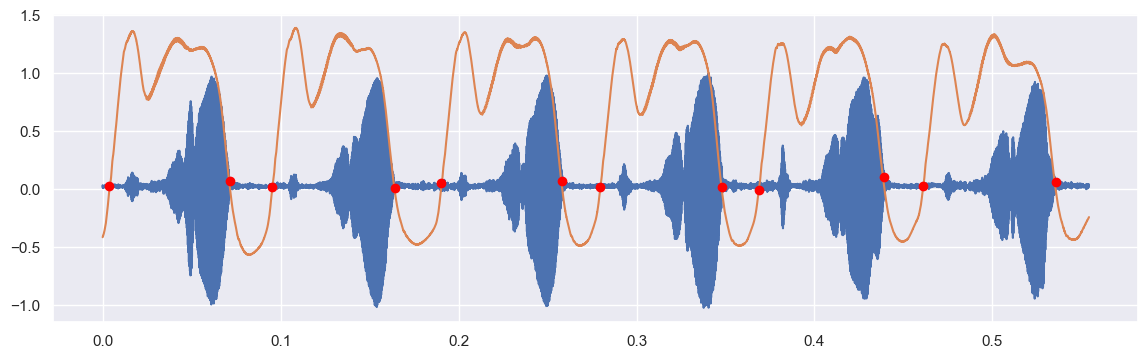

In [107]:
b = p3 + offset3
splits = np.where(np.diff(t[b>0]) > dt*2)[0] + 1
    
silabas = np.split(t[b>0], splits)

plt.figure(figsize=(14,4))
plt.plot(t,s3)
plt.plot(t,b)
for i, sil in enumerate(silabas):
    ti = sil[0]
    tf = sil[-1]
    t_silabas['segmento_3'][i] = {}
    t_silabas['segmento_3'][i]['t_i'] = ti
    t_silabas['segmento_3'][i]['t_f'] = tf
    
    plt.plot([ti,tf],[s3[t==ti],s3[t==tf]],'o', color = 'red')
plt.show()

    
    

### Guardo el archivos con los intervalos de las silabas

In [108]:
import json

with open("sonido-presion/t_silabas.json", "w") as outfile:
    json.dump(t_silabas, outfile)